In [2]:
#import modules
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [3]:
#creating dateframe
credit_df = pd.read_csv('C:\\Users\\skattige.ONE\\Desktop\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION\\CREDIT CARD USERS DATA.csv',sep=',')

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
credit_df.replace("#NULL!",np.nan,inplace=True) # replace #Null values

In [5]:
credit_df['Total_Spent'] = credit_df['cardspent']+credit_df['card2spent']
credit_df.drop(['card2spent','cardspent'],axis=1,inplace=True)

In [6]:
credit_df['Total_item_card'] = credit_df['carditems']+credit_df['card2items']
credit_df.drop(['card2items','carditems'],axis=1,inplace=True)

In [7]:
credit_df.drop(['custid','birthmonth'],axis=1,inplace=True) 

In [8]:
credit_df.drop(['agecat'],axis=1,inplace=True)
credit_df.drop(['empcat'],axis=1,inplace=True)
credit_df.drop(['addresscat'],axis=1,inplace=True)
credit_df.drop(['income','inccat'],axis=1,inplace=True)
credit_df.drop(['creddebt','othdebt'],axis=1,inplace=True)
credit_df['Dissatisfied'] = credit_df['jobsat'].apply(lambda x: 1 if x>=2 else 0)
credit_df['Neutral'] = credit_df['jobsat'].apply(lambda x:1 if x==3 else 0)
credit_df['Satisfied'] = credit_df['jobsat'].apply(lambda x :1 if x>=5 else 0)
credit_df.drop(['jobsat'],axis=1,inplace=True)

In [9]:
#replacing the num values with category values
credit_df.spousedcat.replace(-1.0,'UnMarried',inplace=True)
credit_df.spousedcat.replace(1.0,'Did not complete high school',inplace=True)
credit_df.spousedcat.replace(2.0,'High school degree',inplace=True)
credit_df.spousedcat.replace(3.0,'Some college',inplace=True)
credit_df.spousedcat.replace(4.0,'College degree',inplace=True)
credit_df.spousedcat.replace(5.0,'Post-undergraduate degree',inplace=True)
credit_df.drop(['spoused'],axis=1,inplace=True)
credit_df['Zero_birds'] = credit_df['pets_birds'].map(lambda x:1 if x==0.0 else 0)
credit_df['PetBirds'] = credit_df['pets_birds'].map(lambda x:1 if x>=1.0 else 0)
credit_df['Zero_dogs'] = credit_df['pets_dogs'].map(lambda x :1 if x ==0.0 else 0)
credit_df['PetDogs'] = credit_df['pets_dogs'].map(lambda x :1 if x>=1.0 else 0)
credit_df['Zero_Cat'] = credit_df['pets_cats'].map(lambda x:1 if x==0.0 else 0)
credit_df['PetCats'] = credit_df['pets_cats'].map(lambda x:1 if x>=1.0 else 0)
credit_df['Zero_freshfish'] = credit_df['pets_freshfish'].map(lambda x:1 if x ==0.0 else 0)
credit_df['PetFreshFish'] = credit_df['pets_freshfish'].map(lambda x :1 if x >= 1.0 else 0)
credit_df['Zero_reptiles'] = credit_df['pets_reptiles'].map(lambda x:1 if x ==0.0 else 0)
credit_df['PetsReptiles']  = credit_df['pets_reptiles'].map(lambda x:1 if x>=1.0 else 0)
credit_df['Zero_SaltFish'] = credit_df['pets_saltfish'].map(lambda x:1 if x ==0.0 else 0)
credit_df['PetSaltFish'] = credit_df['pets_saltfish'].map(lambda x:1 if x>=1.0 else 0)
credit_df['Zero_petSmall'] = credit_df['pets_small'].map(lambda x:1 if x==0.0 else 0)
credit_df['petSmall'] = credit_df['pets_small'].map(lambda x:1 if x>= 1.0 else 0)
credit_df.drop(['pets_birds','pets_dogs','pets_freshfish','pets_reptiles','pets_saltfish','pets_small','pets_cats'],axis=1,inplace=True)
credit_df.hometype.replace(1.0,'Single-family',inplace=True)
credit_df.hometype.replace(2.0,'Multiple-Family',inplace=True)
credit_df.hometype.replace(3.0,'Condominium/Townhouse',inplace=True)
credit_df.hometype.replace(4.0,'Mobile Home',inplace=True)

In [10]:
credit_df.carown.replace(-1,'NA',inplace=True)
credit_df.carown.replace(0,'Lease',inplace=True)
credit_df.carown.replace(1,'Own',inplace=True)
credit_df.cartype.replace(-1,'NA',inplace=True)
credit_df.cartype.replace(0,'Domestic',inplace=True)
credit_df.cartype.replace(1,'Import',inplace=True)
credit_df.carcatvalue.replace(-1,'NA',inplace=True)
credit_df.carcatvalue.replace(1,'Economy',inplace=True)
credit_df.carcatvalue.replace(2,'Standard',inplace=True)
credit_df.carcatvalue.replace(3,'Luxury',inplace=True)
credit_df.union.replace(0.0,'No',inplace=True)
credit_df.union.replace(1.0,'Yes',inplace=True)
credit_df.retire.replace(0,'No',inplace=True)
credit_df.retire.replace(1,'Yes',inplace=True)
credit_df.default.replace(0.0,'NO',inplace=True)
credit_df.default.replace(1.0,'YES',inplace=True)
credit_df.marital.replace(0.0,'Unmarried',inplace=True)
credit_df.marital.replace(1.0,'Married',inplace=True)
credit_df.homeown.replace(0.0,'Rent',inplace=True)
credit_df.homeown.replace(1.0,'own',inplace=True)
credit_df.carbought.replace(-1.0,'N/A',inplace=True)
credit_df.carbought.replace(0.0,'No',inplace=True)
credit_df.carbought.replace(1.0,'Yes',inplace=True)
credit_df.carbuy.replace(0.0,'No',inplace=True)
credit_df.carbuy.replace(1.0,'Yes',inplace=True)
credit_df.owncd.replace(0.0,'No',inplace=True)
credit_df.owncd.replace(1.0,'Yes',inplace=True)
credit_df.owndvd.replace(0.0,'No',inplace=True)
credit_df.owndvd.replace(1.0,'Yes',inplace=True)
credit_df.ownfax.replace(0.0,'No',inplace=True)
credit_df.ownfax.replace(1.0,'Yes',inplace=True)
credit_df.owngame.replace(0.0,'No',inplace=True)
credit_df.owngame.replace(1.0,'Yes',inplace=True)
credit_df.ownipod.replace(0.0,'No',inplace=True)
credit_df.ownipod.replace(1.0,'Yes',inplace=True)
credit_df.ownpc.replace(0.0,'No',inplace=True)
credit_df.ownpc.replace(1.0,'yes',inplace=True)
credit_df.ownpda.replace(0.0,'No',inplace=True)
credit_df.ownpda.replace(1.0,'Yes',inplace=True)
credit_df.owntv.replace(0.0,'NO',inplace=True)
credit_df.owntv.replace(1.0,'yes',inplace=True)
credit_df.ownvcr.replace(0.0,'No',inplace=True)
credit_df.ownvcr.replace(1.0,'Yes',inplace=True)
credit_df.news.replace(0.0,'No',inplace=True)
credit_df.news.replace(1.0,'Yes',inplace=True)
credit_df.response_01.replace(0.0,'No',inplace=True)
credit_df.response_01.replace(1.0,'yes',inplace=True)
credit_df.response_02.replace(0.0,'No',inplace=True)
credit_df.response_02.replace(1.0,'Yes',inplace=True)
credit_df.response_03.replace(0.0,'No',inplace=True)
credit_df.response_03.replace(1.0,'Yes',inplace=True)
credit_df.callwait.replace(0.0,'No',inplace=True)
credit_df.callwait.replace(1.0,'Yes',inplace=True)
credit_df.forward.replace(0.0,'No',inplace=True)
credit_df.forward.replace(1.0,'Yes',inplace=True)
credit_df.confer.replace(0.0,'No',inplace=True)
credit_df.confer.replace(1.0,'Yes',inplace=True)
credit_df.ebill.replace(0.0,'No',inplace=True)
credit_df.ebill.replace(1.0,'Yes',inplace=True)
credit_df.ebill.replace(0.0,'No',inplace=True)
credit_df.ebill.replace(1.0,'Yes',inplace=True)
credit_df.churn.replace(0.0,'No',inplace=True)
credit_df.churn.replace(1.0,'Yes',inplace=True)
credit_df.tollfree.replace(0.0,'No',inplace=True)
credit_df.tollfree.replace(1.0,'Yes',inplace=True)
credit_df.wireless.replace(0.0,'No',inplace=True)
credit_df.wireless.replace(1.0,'Yes',inplace=True)
credit_df.multline.replace(0.0,'No',inplace=True)
credit_df.multline.replace(1.0,'Yes',inplace=True)
credit_df.voice.replace(0.0,'No',inplace=True)
credit_df.voice.replace(1.0,'Yes',inplace=True)
credit_df.pager.replace(0.0,'No',inplace=True)
credit_df.pager.replace(1.0,'Yes',inplace=True)
credit_df.internet.replace(0.0,'None',inplace=True)
credit_df.internet.replace(1.0,'Dial-Up',inplace=True)
credit_df.internet.replace(2.0,'DSL',inplace=True)
credit_df.internet.replace(3.0,'Cable modem',inplace=True)
credit_df.internet.replace(4.0,'other',inplace=True)
credit_df.commute.replace(1.0,'car',inplace=True)
credit_df.commute.replace(2.0,'Motorcycle',inplace=True)
credit_df.commute.replace(3.0,'carpool',inplace=True)
credit_df.commute.replace(4.0,'Bus',inplace=True)
credit_df.commute.replace(5.0,'Train/Subway',inplace=True)
credit_df.commute.replace(6.0,'otherpublictransport',inplace=True)
credit_df.commute.replace(7.0,'bicycle',inplace=True)
credit_df.commute.replace(8.0,'walk',inplace=True)
credit_df.commute.replace(9.0,'other NoN motorized transit',inplace=True)
credit_df.commute.replace(10.0,'Telecommute',inplace=True)
credit_df['commute'] = credit_df['commute'].map(lambda x: 'Others' if x not in ('car') else x)
credit_df.jobcat.replace(1.0,'Managerial&Professional',inplace=True)
credit_df.jobcat.replace(2.0,'Sales and Office',inplace=True)
credit_df.jobcat.replace(3.0,'Service',inplace=True)
credit_df.jobcat.replace(4.0,'Agricultural & Natural Resources',inplace=True)
credit_df.jobcat.replace(5.0,'Craft, Repair',inplace=True)
credit_df.jobcat.replace(6.0,'Fabrication, General Labor',inplace=True)
credit_df['jobcat'] = credit_df['jobcat'].apply(lambda x:'Others' if x not in ['Sales and Office','Managerial&Professional'] else x)
credit_df.gender.value_counts()
credit_df.gender.replace(0,'Male',inplace=True)
credit_df.gender.replace(1,'Female',inplace=True)
credit_df.region.replace(5.0,'Zone5',inplace=True)
credit_df.region.replace(4.0,'Zone4',inplace=True)
credit_df.region.replace(3.0,'Zone3',inplace=True)
credit_df.region.replace(2.0,'Zone2',inplace=True)
credit_df.region.replace(1.0,'Zone1',inplace=True)
credit_df.marital.replace(0.0,'Unmarried',inplace=True)
credit_df.marital.replace(1.0,'Married',inplace=True)
credit_df.homeown.replace(0.0,'Rent',inplace=True)
credit_df.homeown.replace(1.0,'own',inplace=True)
credit_df.card.replace(1.0,'American Express',inplace=True)
credit_df.card.replace(2.0,'Visa',inplace=True)
credit_df.card.replace(3.0,'Mastercard',inplace=True)
credit_df.card.replace(4.0,'Discover',inplace=True)
credit_df.card.replace(5.0,'Other',inplace=True)
credit_df.card2.replace(1.0,'American Express',inplace=True)
credit_df.card2.replace(2.0,'Visa',inplace=True)
credit_df.card2.replace(3.0,'Mastercard2',inplace=True)
credit_df.card2.replace(4.0,'Discover',inplace=True)
credit_df.card2.replace(5.0,'Other',inplace=True)
credit_df.cardtype.replace(1.0,'None',inplace=True)
credit_df.cardtype.replace(2.0,'Gold',inplace=True)
credit_df.cardtype.replace(3.0,'Platinum',inplace=True)
credit_df.cardtype.replace(4.0,'Other',inplace=True)
credit_df.card2type.replace(1.0,'None',inplace=True)
credit_df.card2type.replace(2.0,'Gold',inplace=True)
credit_df.card2type.replace(3.0,'Platinum',inplace=True)
credit_df.card2type.replace(4.0,'Other',inplace=True)
credit_df.cardbenefit.replace(1.0,'None',inplace=True)
credit_df.cardbenefit.replace(2.0,'Cash back',inplace=True)
credit_df.cardbenefit.replace(3.0,'Airline miles',inplace=True)
credit_df.cardbenefit.replace(4.0,'Other',inplace=True)
credit_df.card2benefit.replace(1.0,'None',inplace=True)
credit_df.card2benefit.replace(2.0,'Cash back',inplace=True)
credit_df.card2benefit.replace(3.0,'Airline miles',inplace=True)
credit_df.card2benefit.replace(4.0,'Other',inplace=True)
credit_df.card2fee.replace(0.0,'No',inplace=True)
credit_df.cardfee.replace(1.0,'Yes',inplace=True)

credit_df.bfast.replace(3.0,'Cereal',inplace=True)
credit_df.bfast.replace(2.0,'Oatmeal',inplace=True)
credit_df.bfast.replace(1.0,'Energy bar',inplace=True)
credit_df.active.replace(0.0,'No',inplace=True)
credit_df.active.replace(1.0,'Yes',inplace=True)
credit_df.callid.replace(0.0,'No',inplace=True)
credit_df.callid.replace(1.0,'Yes',inplace=True)

In [11]:
credit_df.commutebike.replace(0.0,'NO',inplace=True)
credit_df.commutebike.replace(1.0,'Yes',inplace=True)
credit_df.commutebus.replace(0.0,'No',inplace=True)
credit_df.commutebus.replace(1.0,'Yes',inplace=True)
credit_df.commutecar.replace(0.0,'No',inplace=True)
credit_df.commutecar.replace(1.0,'Yes',inplace=True)
credit_df.commutecarpool.replace(0.0,'No',inplace=True)
credit_df.commutecarpool.replace(1.0,'Yes',inplace=True)
credit_df.commutemotorcycle.replace(0.0,'No',inplace=True)
credit_df.commutemotorcycle.replace(1.0,'Yes',inplace=True)
credit_df.commutenonmotor.replace(0.0,'No',inplace=True)
credit_df.commutenonmotor.replace(1.0,'Yes',inplace=True)
credit_df.commutepublic.replace(0.0,'No',inplace=True)
credit_df.commutepublic.replace(1.0,'yes',inplace=True)
credit_df.commuterail.replace(0.0,'No',inplace=True)
credit_df.commuterail.replace(1.0,'Yes',inplace=True)
credit_df.commutewalk.replace(0.0,'No',inplace=True)
credit_df.commutewalk.replace(1.0,'Yes',inplace=True)
credit_df.telecommute.replace(0.0,'No',inplace=True)
credit_df.telecommute.replace(1.0,'Yes',inplace=True)


In [12]:
credit_df['reason'] = credit_df['reason'].apply(lambda x:'others' if x not in [9.0] else x)
credit_df.reason.replace(9.0,'NoResponse',inplace=True)
credit_df['reason'] = credit_df.reason.astype(str)
credit_df.drop(['polparty','polcontrib','vote'],axis=1,inplace=True)

In [13]:
credit_df['lnothdebt'] = credit_df.lnothdebt.astype(float)
credit_df['cardten'] = credit_df.cardten.astype(float)
credit_df['lncardmon'] = credit_df.lncardmon.astype(float)
credit_df['lntollten'] = credit_df.lntollten.astype(float)
credit_df['lncreddebt'] = credit_df.lncreddebt.astype(float)
credit_df['longten'] = credit_df.longten.astype(float)
credit_df['lnlongten'] = credit_df.lnlongten.astype(float)
credit_df['lncardten'] = credit_df.lncardten.astype(float)
credit_df['lnequipmon'] = credit_df.lnequipmon.astype(float)
credit_df['commutetime'] = credit_df.commutetime.astype(float)

In [14]:
credit_df.drop(['lnwiremon','lnwireten','lntollmon','lnequipten'],axis=1,inplace=True) # containg more that 50% of null values

In [15]:
credit_cat = credit_df.select_dtypes(include=['object'])

In [16]:
credit_cat.drop(['townsize'],axis=1,inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
credit_cat.cardfee.replace(1.0,'Yes',inplace=True)
credit_cat.card2fee.value_counts()
credit_cat.cardfee.replace(0.0,'No',inplace=True)
credit_cat.cardfee.value_counts()

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


No     4051
Yes     949
Name: cardfee, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_Var_encode = credit_cat.columns
for var in cat_Var_encode:
    credit_cat[var] = le.fit_transform(credit_cat[var])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
credit_num = credit_df.select_dtypes(include=['float64','int64'])

In [20]:
credit_num.drop(['lntollten','lnequipmon'],axis=1,inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
def missing_imputation(x):
    x = x.fillna(x.mean())
    return x
credit_num = credit_num.apply(lambda x:missing_imputation(x))

In [22]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [23]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.00,18.0000,20.0000,23.000,31.0000,47.000000,62.0000,72.000,76.0000,79.0000,79.00
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.00,8.0000,9.0000,10.000,12.0000,14.000000,17.0000,19.000,20.0000,21.0000,23.00
edcat,5000.0,0.0,1.336000e+04,2.672000,2.000000,1.211738,1.468310e+00,1.00,1.0000,1.0000,1.000,2.0000,2.000000,4.0000,4.000,5.0000,5.0000,5.00
employ,5000.0,0.0,4.865200e+04,9.730400,7.000000,9.690929,9.391410e+01,0.00,0.0000,0.0000,0.000,2.0000,7.000000,15.0000,25.000,31.0000,39.0000,52.00
lninc,5000.0,0.0,1.849920e+04,3.699840,3.640000,0.746945,5.579273e-01,2.20,2.2000,2.5600,2.770,3.1800,3.640000,4.2000,4.691,4.9900,5.6100,6.98
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.00,0.7000,1.9000,2.800,5.1000,8.800000,13.6000,18.600,22.2000,29.2000,43.10
lncreddebt,5000.0,0.0,-6.523005e+02,-0.130460,-0.080000,1.272893,1.620258e+00,-6.60,-3.4001,-2.2900,-1.740,-0.9500,-0.080000,0.7200,1.460,1.8505,2.6600,4.69
lnothdebt,5000.0,0.0,3.484747e+03,0.696949,0.740000,1.128475,1.273456e+00,-4.09,-2.1700,-1.2405,-0.780,-0.0200,0.740000,1.4600,2.090,2.4700,3.1801,4.95
reside,5000.0,0.0,1.102000e+04,2.204000,2.000000,1.393977,1.943173e+00,1.00,1.0000,1.0000,1.000,1.0000,2.000000,3.0000,4.000,5.0000,6.0000,9.00
pets,5000.0,0.0,1.533700e+04,3.067400,2.000000,3.414497,1.165879e+01,0.00,0.0000,0.0000,0.000,0.0000,2.000000,5.0000,8.000,10.0000,13.0000,21.00


In [24]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
credit_num = credit_num.apply(lambda x:outlier_capping(x))

In [25]:
num_summary= credit_num.apply(lambda x:var_summary(x)).T

In [26]:
total_df = pd.concat([credit_cat,credit_num],axis=1)

In [27]:
pandas_profiling.ProfileReport(total_df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [28]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from  sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


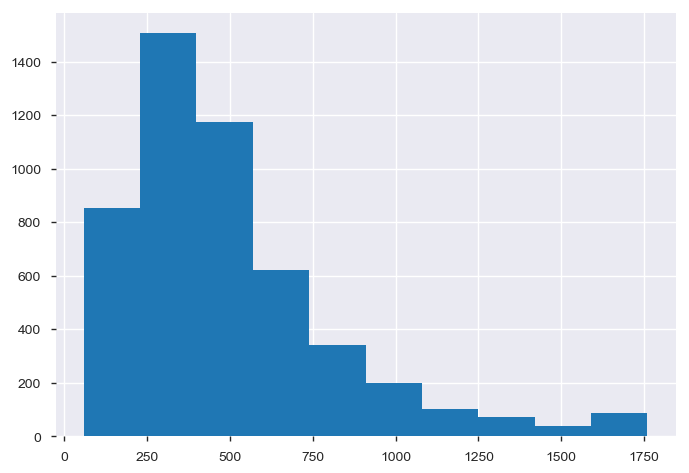

In [29]:
total_df.Total_Spent.hist()

In [30]:
total_df['lnTotal_Spent'] = np.log(total_df['Total_Spent']+1)
total_df.drop(['Total_Spent'],axis=1,inplace=True)

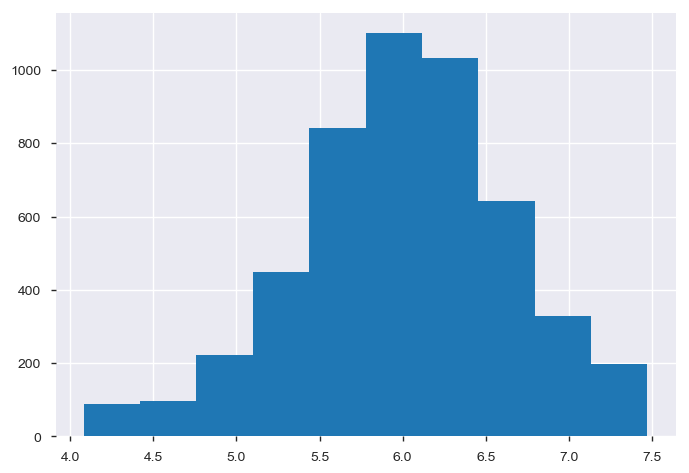

In [31]:
total_df.lnTotal_Spent.hist()

In [34]:
feature_cols = total_df.columns.difference(['lnTotal_Spent'])
X = total_df[feature_cols]
y = total_df['lnTotal_Spent']

In [35]:
RCR = RandomForestRegressor()
RCR.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
score = np.round(RCR.feature_importances_,3)

In [42]:
rfe = RFE(RCR,n_features_to_select=20)
rfe.fit(X,y)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [43]:
cols = X.columns[rfe.get_support()]
print(cols)

Index([u'Total_item_card', u'address', u'age', u'card', u'card2', u'carvalue',
       u'commutetime', u'debtinc', u'ed', u'employ', u'hourstv', u'lncardmon',
       u'lncardten', u'lncreddebt', u'lninc', u'lnothdebt', u'longmon',
       u'longten', u'pets', u'tollten'],
      dtype='object')


In [44]:
X = total_df[cols]

In [45]:
train_X,test_X,train_y,test_y = train_test_split(X,y,random_state = 123,test_size=0.3)

In [51]:
RC = RandomForestRegressor(n_jobs=-1)
RC.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
RC.score(test_X,test_y)

0.60181752578673364

In [53]:
cross_score = cross_val_score(RC,train_X,train_y,cv=10)
print('cross_val:',cross_score.mean())

('cross_val:', 0.64417463321472213)


In [57]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(RC.predict(train_X),train_y)))

('RMSE:', 0.16544133216068352)


In [59]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(RC.predict(test_X),test_y)))

('RMSE:', 0.3878755560062821)


In [60]:
from sklearn.linear_model import Ridge

In [61]:
ridge = Ridge(alpha=0.5,normalize=True)
ridge.fit(train_X,train_y)
pred = ridge.predict(test_X)

In [63]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(ridge.predict(train_X),train_y)))

('RMSE:', 0.42613744331448133)


In [64]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(pred,test_y)))

('RMSE:', 0.41796769579017101)


In [65]:
ridge.score(test_X,test_y)

0.53763734108892636

In [66]:
crs_score = cross_val_score(ridge,train_X,train_y,cv=10)
print('cross_score:',crs_score.mean())

('cross_score:', 0.57069299711246657)


In [72]:
gb = GradientBoostingRegressor(subsample=0.8)
params = {'n_estimators': range(20,100,10),
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': range(2,10,2),
    'alpha': [0.85]}
GB = GridSearchCV(gb,params,cv=5,scoring='mean_squared_error')
GB.fit(train_X,train_y)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90], 'max_features': [0.5, 1], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [2, 4, 6, 8], 'alpha': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [74]:
print GB.best_estimator_
print GB.best_params_
print GB.best_score_

GradientBoostingRegressor(alpha=0.85, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)
{'max_features': 0.5, 'alpha': 0.85, 'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 2}
-0.127851916389


In [76]:
GBM_Tuned = GradientBoostingRegressor(n_estimators=90,learning_rate=0.1,max_depth=2,min_samples_leaf=1,min_samples_split=2,subsample=0.8,max_features=0.5,random_state=10)

In [77]:
GBM_Tuned.fit(train_X,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, presort='auto', random_state=10,
             subsample=0.8, verbose=0, warm_start=False)

In [78]:
GBM_Tuned.score(test_X,test_y)

0.67151434391910048

In [79]:
cross_scoring = cross_val_score(GBM_Tuned,train_X,train_y,cv=10)
print('train Model',cross_scoring.mean())

('train Model', 0.70026014522394964)


In [80]:
print('RMSE for GBM Model:', np.sqrt(metrics.mean_squared_error(GBM_Tuned.predict(train_X),train_y)))

('RMSE for GBM Model:', 0.34278177930968223)


In [81]:
print('RMSE for GBM TEST Model:',np.sqrt(metrics.mean_squared_error(GBM_Tuned.predict(test_X),test_y)))

('RMSE for GBM TEST Model:', 0.35229748735440186)


In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
kn = KNeighborsRegressor(n_neighbors=8)

In [89]:
params = {'n_neighbors':range(2,12,2),'leaf_size':range(30,100,10)}
Gradient_KN = GridSearchCV(kn,params,cv=25,scoring='mean_squared_error')
Gradient_KN.fit(train_X,train_y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\sit

GridSearchCV(cv=25, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 4, 6, 8, 10], 'leaf_size': [30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [90]:
print Gradient_KN.best_estimator_
print Gradient_KN.best_params_
print Gradient_KN.best_score_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
{'n_neighbors': 10, 'leaf_size': 30}
-0.40787586049


In [91]:
KN_Tuned = KNeighborsRegressor(n_jobs=1,n_neighbors=10,leaf_size=30,p=2)
KN_Tuned.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [93]:
print('RMSE Train model:',np.sqrt(metrics.mean_squared_error(KN_Tuned.predict(train_X),train_y)))
print('RMSE test Model:',np.sqrt(metrics.mean_squared_error(KN_Tuned.predict(test_X),test_y)))

('RMSE Train model:', 0.57340525041427648)
('RMSE test Model:', 0.60456207888350166)


In [94]:
df_pred = pd.DataFrame({'Actual': test_y,'predicted':KN_Tuned.predict(test_X)})

In [95]:
df_pred.head()

,Actual,predicted
2648,5.788399,5.719310
2456,6.246146,6.176291
4557,6.332427,6.068793
4884,6.183014,5.368680
92,6.197970,6.460384


In [96]:
df_pred.tail()

,Actual,predicted
3014,6.001539,6.014692
734,4.791899,5.423111
452,5.381187,5.866732
2558,5.872512,5.904109
1927,5.796908,6.298513
